<a href="https://colab.research.google.com/github/kumarlova/Credit-Card-Default-Prediction/blob/main/Copy_of_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install --upgrade xlrd

In [ ]:
import xlrd

In [ ]:
#Importing the Excel file
df=pd.read_excel('/content/drive/MyDrive/Credit card fraud detection/default of credit card clients.xls',header=1)

In [ ]:
#Top 5 Rows of Data
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#Last rows
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [ ]:
#Checking null values
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

###There is no null values in our data set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [ ]:
#Rows and columns
df.shape

(30000, 25)

In [ ]:
#Checking for numerical columns
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [ ]:
#About columns
dict1 = {}
for i in list(df.columns):
  dict1.update({i:df[i].nunique()})
dict1

{'AGE': 56,
 'BILL_AMT1': 22723,
 'BILL_AMT2': 22346,
 'BILL_AMT3': 22026,
 'BILL_AMT4': 21548,
 'BILL_AMT5': 21010,
 'BILL_AMT6': 20604,
 'EDUCATION': 7,
 'ID': 30000,
 'LIMIT_BAL': 81,
 'MARRIAGE': 4,
 'PAY_0': 11,
 'PAY_2': 11,
 'PAY_3': 11,
 'PAY_4': 11,
 'PAY_5': 10,
 'PAY_6': 10,
 'PAY_AMT1': 7943,
 'PAY_AMT2': 7899,
 'PAY_AMT3': 7518,
 'PAY_AMT4': 6937,
 'PAY_AMT5': 6897,
 'PAY_AMT6': 6939,
 'SEX': 2,
 'default payment next month': 2}

In [ ]:
numerical_columns=df.describe().columns
numerical_columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

##**EDA**

###**Univatiate Analysis**

###**(i)Independent variable**

In [ ]:
##Dependent variable
df.rename(columns={'default payment next month' : 'Defaulter'}, inplace=True)

In [ ]:
#Dependent variable value count
df['Defaulter'].value_counts()

0    23364
1     6636
Name: Defaulter, dtype: int64

Text(0.5, 1.0, 'default payment next month')

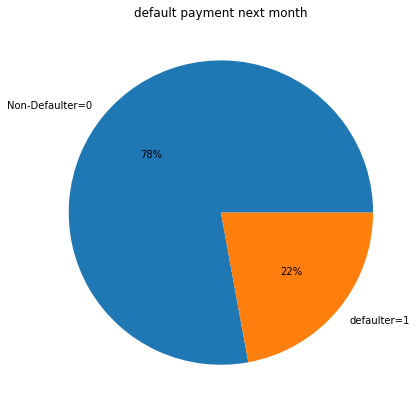

In [ ]:
#Pie plot
fig, ax = plt.subplots(figsize = (15, 30))

plt.subplot(3,2,1)
labels = 'Non-Defaulter=0', 'defaulter=1'
plt.pie(df['Defaulter'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("default payment next month")

###from the above data we can conclude that

1.Non-defaulter were 23364, Defaulter were 6636

2.The above pie charts said Non-defaulters 77.88% ,and defaulter were 22.12%

###**(ii)Independent variables**

####**(a)Credit limit balance**

In [ ]:
#Credit limit
df['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

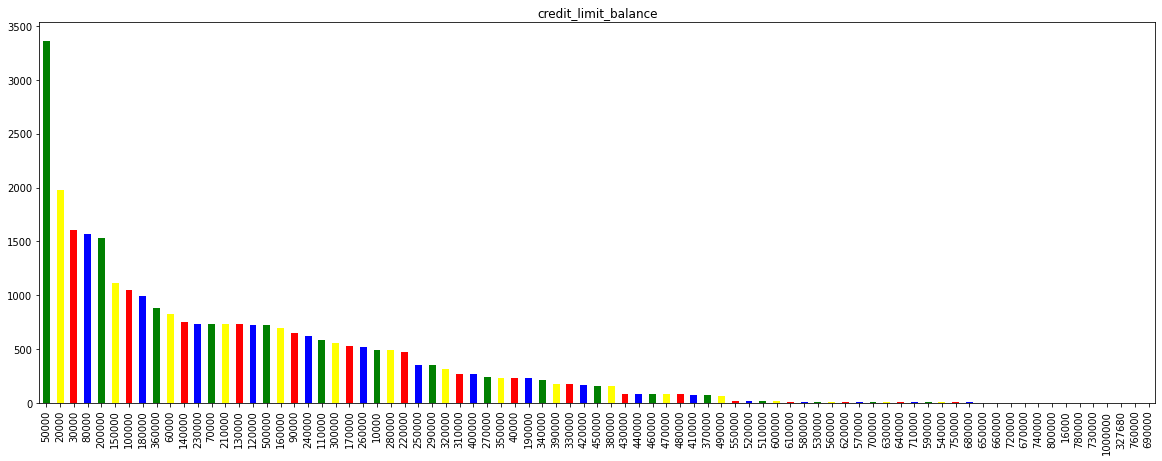

In [ ]:
plt.figure(figsize=(20,7))
df['LIMIT_BAL'].value_counts().plot(kind="bar",color={"blue","green","red","yellow"})
plt.title("credit_limit_balance")
plt.show()

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000




*   From the above data we can conclude that most of people
available credit balance is 50,000 to 3365 members.
*   Maximum available credit balance limit is 1,00,000.

*   Minimum available credit balance limit is 10,000.








###**(b)Sex**
Male-1

Female-2

In [ ]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

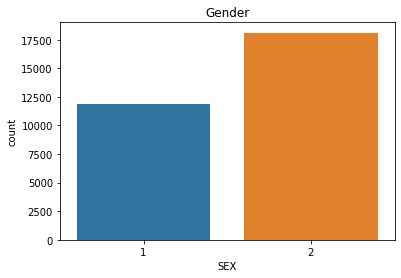

In [ ]:
sns.countplot(df['SEX'])
plt.title("Gender")
plt.show()



###  From the above data 
we can conclude that male are 
11,888 represented as 1 and female are 18,112 represented as 2  are having the credit cards.







###**(c)Education**
1 = graduate school

2 = university

3 = high school

4,5,6 = others

In [ ]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

###In descption of dataset said except 1,2,3 any other number taken count as 4 so in our data of education others data also available number as 4,5,6 so all this numbers convert into as 4 only

In [ ]:
df["EDUCATION"]=df["EDUCATION"].replace({5:4,6:4,0:4})

In [ ]:
df["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

<function matplotlib.pyplot.show>

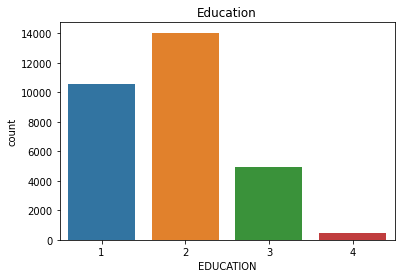

In [ ]:
sns.countplot(df['EDUCATION'])
plt.title("Education")
plt.show

###From the above data we can conclude that Education in


*  University people having high credit cards with number 14,030.
*  Graduate school people having  second highest credit cards with number 10,585.



*  Graduate school people having  second lowest credit cards with number 4917.
*  Other studying people having  lowest credit cards with number 468 .




###**(d)Marriage**

Married = 1

Singles = 2

others = 3

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In our data describe about married persons represented with 1, singles represented with 2, others represented with 3, but out dataset include "0" but it tells about anything so we simply move to others category.

In [ ]:
df['MARRIAGE']=df['MARRIAGE'].replace({0:3})

In [ ]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

Text(0.5, 1.0, 'Marital status')

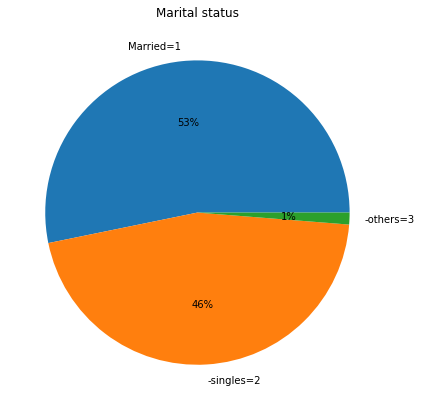

In [ ]:
#Pie plot
fig, ax = plt.subplots(figsize = (15, 30))

plt.subplot(3,2,1)
labels =  'Married=1',  '-singles=2',  '-others=3'
plt.pie(df['MARRIAGE'].value_counts(), labels=labels ,autopct='%1.0f%%')
plt.title("Marital status")

From the above pie chart we can say that

1.married people were 46%

2.singles were 53%

3.others were 1%

###**(e)Age**

In [ ]:
df['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

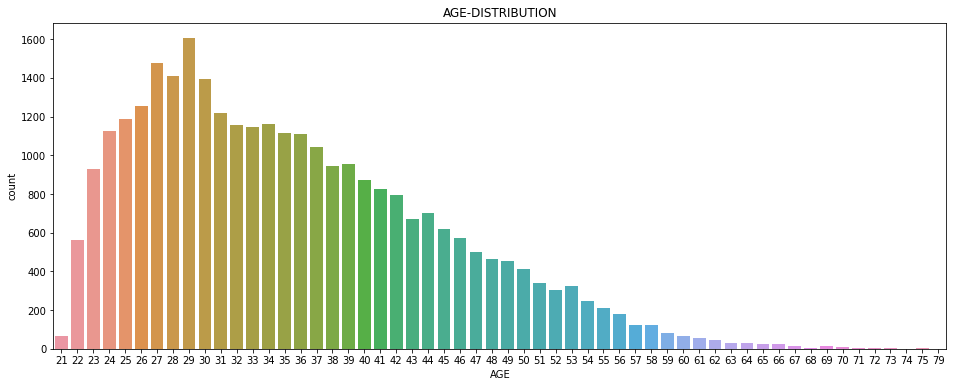

In [ ]:
plt.figure(figsize=(16,6))
sns.countplot(df['AGE'])
plt.title("AGE-DISTRIBUTION")
plt.show()

From the above data we can conclude that
 
1.most of credit cardholders AGE was 25-45 and above age 60 people are used rarely creditcards

2.most of 29th age people used huge credit cards that number is 1605 and second place was 27th age people it's number 1477

###**(f)Remaining columns**

In [ ]:
# renameing column Names
df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,Defaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
#checking for duplicates
len(df[df.duplicated()])

0

###No duplicate columns in our data set.

###**(g)Bill AMOUNT**

In [ ]:
print(df['BILL_AMT_APR'].value_counts())
print("\n")
print("\n")


print(df['BILL_AMT_MAY'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_JUN'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_JUL'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_AUG'].value_counts())
print("\n")
print("\n")

print(df['BILL_AMT_SEPT'].value_counts())

0         4020
390        207
780         86
150         78
316         77
          ... 
26852        1
108660       1
480          1
15298        1
15313        1
Name: BILL_AMT_APR, Length: 20604, dtype: int64




0        3506
390       235
780        94
316        79
326        62
         ... 
19341       1
66726       1
80682       1
28508       1
32428       1
Name: BILL_AMT_MAY, Length: 21010, dtype: int64




0         3195
390        246
780        101
316         68
326         62
          ... 
97189        1
118839       1
23567        1
18377        1
36535        1
Name: BILL_AMT_JUN, Length: 21548, dtype: int64




0         2870
390        275
780         74
326         63
316         62
          ... 
19580        1
45129        1
227807       1
39330        1
49764        1
Name: BILL_AMT_JUL, Length: 22026, dtype: int64




0        2506
390       231
326        75
780        75
316        72
         ... 
26357       1
85195       1
6889        1
11004       1
489

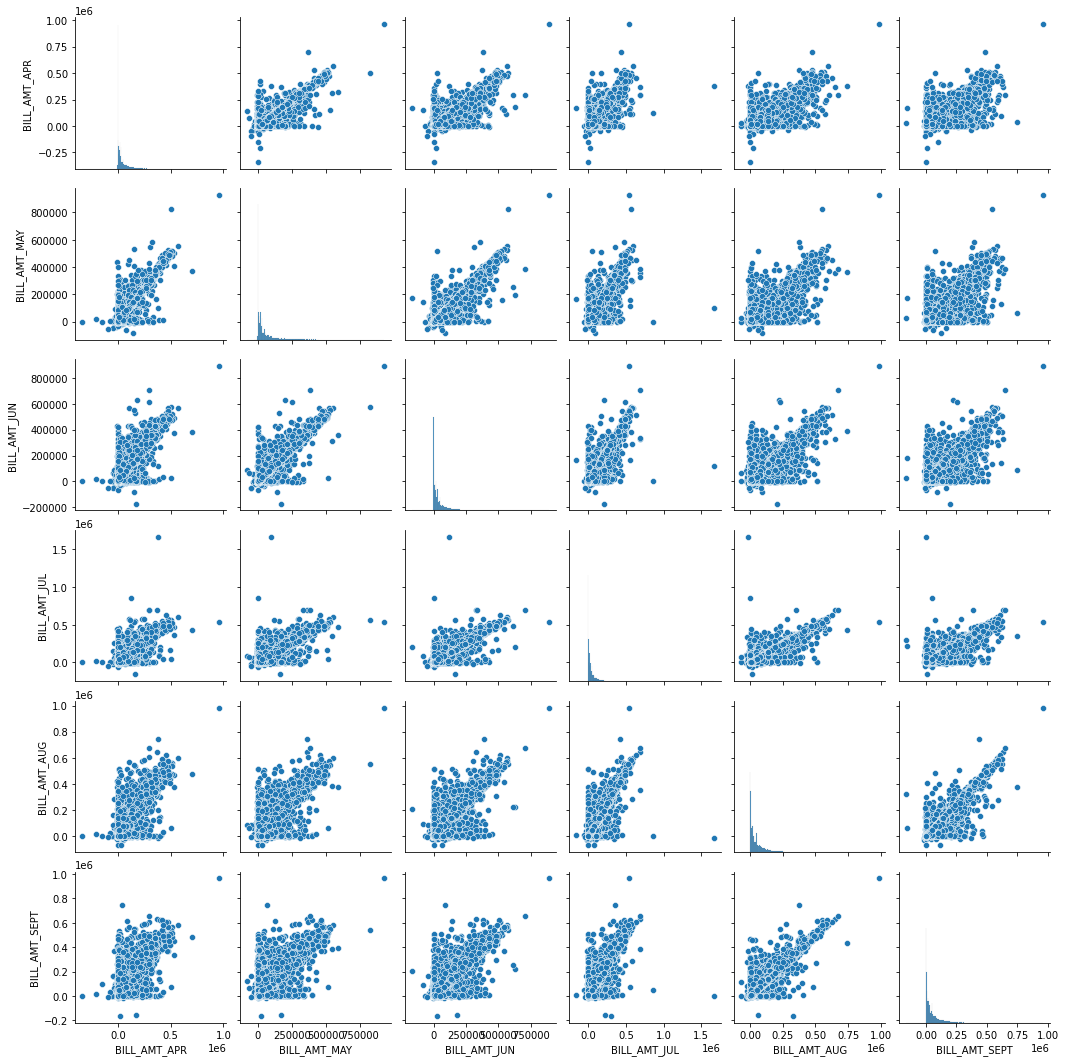

In [ ]:
bill_amount=df[['BILL_AMT_APR',  'BILL_AMT_MAY',   'BILL_AMT_JUN',   'BILL_AMT_JUL',   'BILL_AMT_AUG',   'BILL_AMT_SEPT']]

sns.pairplot(data=bill_amount)
plt.show()

###The above pairplot shows that distribution of bill amount statements for each month explicitly for defaulters and non-defaulters.

###**(h)Monthly Payments**

In [ ]:
#sepember month payment with defaulter
df.groupby(['PAY_SEPT','Defaulter']).size() 

PAY_SEPT  Defaulter
-2        0             2394
          1              365
-1        0             4732
          1              954
 0        0            12849
          1             1888
 1        0             2436
          1             1252
 2        0              823
          1             1844
 3        0               78
          1              244
 4        0               24
          1               52
 5        0               13
          1               13
 6        0                5
          1                6
 7        0                2
          1                7
 8        0                8
          1               11
dtype: int64

In [ ]:
#August month payment with defaulter
df.groupby(['PAY_AUG','Defaulter']).size() 

PAY_AUG  Defaulter
-2       0             3091
         1              691
-1       0             5084
         1              966
 0       0            13227
         1             2503
 1       0               23
         1                5
 2       0             1743
         1             2184
 3       0              125
         1              201
 4       0               49
         1               50
 5       0               10
         1               15
 6       0                3
         1                9
 7       0                8
         1               12
 8       0                1
dtype: int64

In [ ]:
#July month payment with defaulter
df.groupby(['PAY_JUL','Defaulter']).size() 

PAY_JUL  Defaulter
-2       0             3328
         1              757
-1       0             5012
         1              926
 0       0            13013
         1             2751
 1       0                3
         1                1
 2       0             1850
         1             1969
 3       0              102
         1              138
 4       0               32
         1               44
 5       0                9
         1               12
 6       0                9
         1               14
 7       0                5
         1               22
 8       0                1
         1                2
dtype: int64

In [ ]:
#June month payment with defaulter
df.groupby(['PAY_JUN','Defaulter']).size() 

PAY_JUN  Defaulter
-2       0             3511
         1              837
-1       0             4783
         1              904
 0       0            13439
         1             3016
 1       0                1
         1                1
 2       0             1506
         1             1653
 3       0               70
         1              110
 4       0               23
         1               46
 5       0               17
         1               18
 6       0                3
         1                2
 7       0               10
         1               48
 8       0                1
         1                1
dtype: int64

In [ ]:
#May month payment with defaulter
df.groupby(['PAY_MAY','Defaulter']).size() 

PAY_MAY  Defaulter
-2       0             3651
         1              895
-1       0             4642
         1              897
 0       0            13752
         1             3195
 2       0             1203
         1             1423
 3       0               65
         1              113
 4       0               33
         1               51
 5       0                7
         1               10
 6       0                1
         1                3
 7       0               10
         1               48
 8       1                1
dtype: int64

In [ ]:
#April month payment with defaulter
df.groupby(['PAY_APR','Defaulter']).size() 

PAY_APR  Defaulter
-2       0             3914
         1              981
-1       0             4765
         1              975
 0       0            13217
         1             3069
 2       0             1365
         1             1401
 3       0               66
         1              118
 4       0               18
         1               31
 5       0                6
         1                7
 6       0                5
         1               14
 7       0                8
         1               38
 8       1                2
dtype: int64

##**Multivariate analysis**

###**(i)Monthly Defaulters**

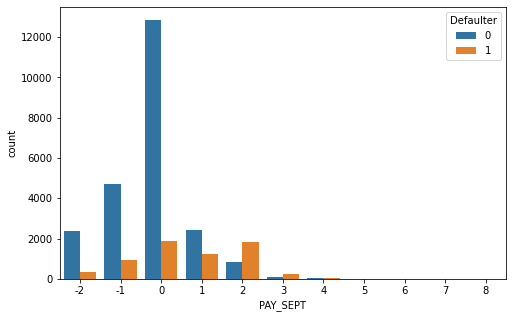

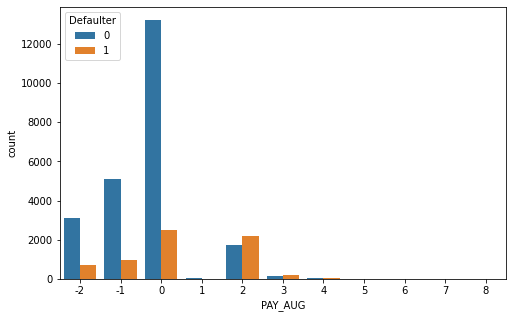

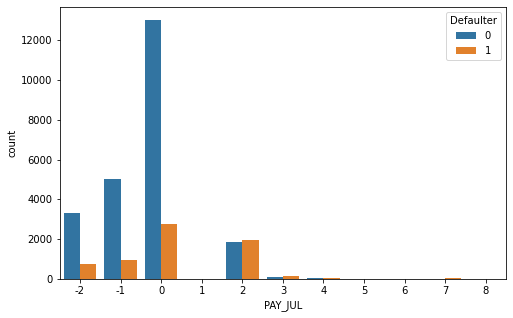

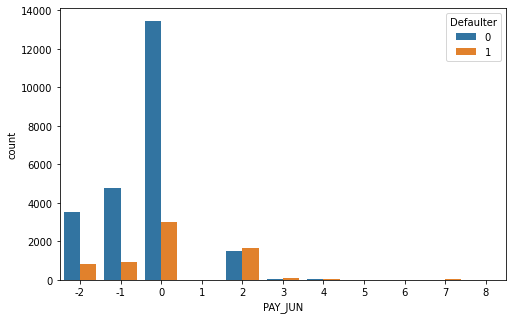

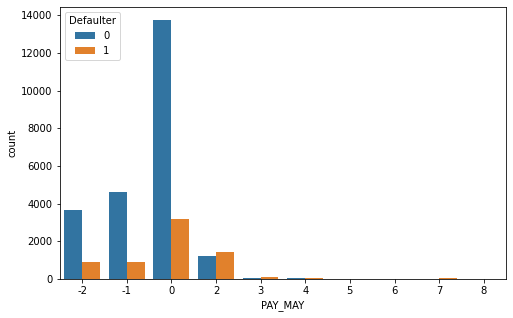

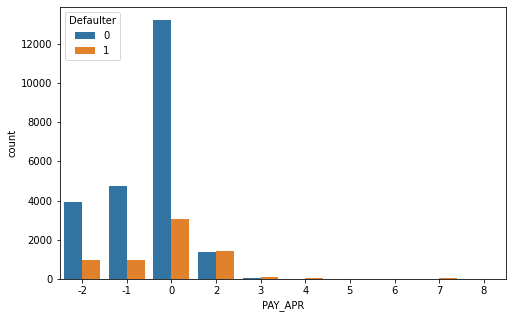

In [ ]:
payment=["PAY_SEPT","PAY_AUG", "PAY_JUL",  "PAY_JUN",  "PAY_MAY",  "PAY_APR"]

for col in payment:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col, hue="Defaulter" , data= df)

##From the above data we can conclude that

**PAY_SEPT**:


1.In the payment of september month single rupee not recieve from Non-defaulters were 2394 persons, and from defaulters were 365 persons.

2.Full amount received from Non-defaulters were 4732 persons and defaulters were 954 persons.

3.Minmum amount recevied from Non- defaulters were 12,849 persons and Defaulters were 1888 persons.

**PAY_AUG**:

1.In the payment of september month single rupee not recieve from Non-defaulters were 3,091 persons, and from defaulters were 691 persons.

2.Full amount received from Non-defaulters were 5,084 persons and defaulters were 966 persons.

3.Minmum amount recevied from Non- defaulters were 13,227 persons and Defaulters were 2,503 persons.

**PAY_JUL**

1.In the payment of september month single rupee not recieve from Non-defaulters were 3328 persons, and from defaulters were 757 persons.

2.Full amount received from Non-defaulters were 5012 persons and defaulters were 926 persons.

3.Minmum amount recevied from Non- defaulters were 13,013 persons and Defaulters were 2,751 persons.

**PAY_JUN**

1.In the payment of september month single rupee not recieve from Non-defaulters were 3,511 persons, and from defaulters were 837persons.

2.Full amount received from Non-defaulters were 4,783 persons and defaulters were 904 persons.

3.Minmum amount recevied from Non- defaulters were 13,439persons and Defaulters were 3,016persons.

**PAY_MAY**

1.In the payment of september month single rupee not recieve from Non-defaulters were 3,651persons, and from defaulters were 895persons.

2.Full amount received from Non-defaulters were 4,642 persons and defaulters were 897 persons.

3.Minmum amount recevied from Non- defaulters were 13,752persons and Defaulters were 3,195persons.

**PAY_APR**

1.In the payment of september month single rupee not recieve from Non-defaulters were 3,914persons, and from defaulters were 981persons.

2.Full amount received from Non-defaulters were 4,765 persons and defaulters were 975 persons.

3.Minmum amount recevied from Non- defaulters were 13,217persons and Defaulters were 3,069persons.

 **COMMON POINT** Representing others numbers like 1,2,3,4,5,6,7,8 Delaying payment in months.

###**(ii)The distribution of amount of previous payment for each month**

In [ ]:
pay_amount = df[['PAY_AMT_SEPT','PAY_AMT_AUG','PAY_AMT_JUL','PAY_AMT_JUN','PAY_AMT_MAY','PAY_AMT_APR']]

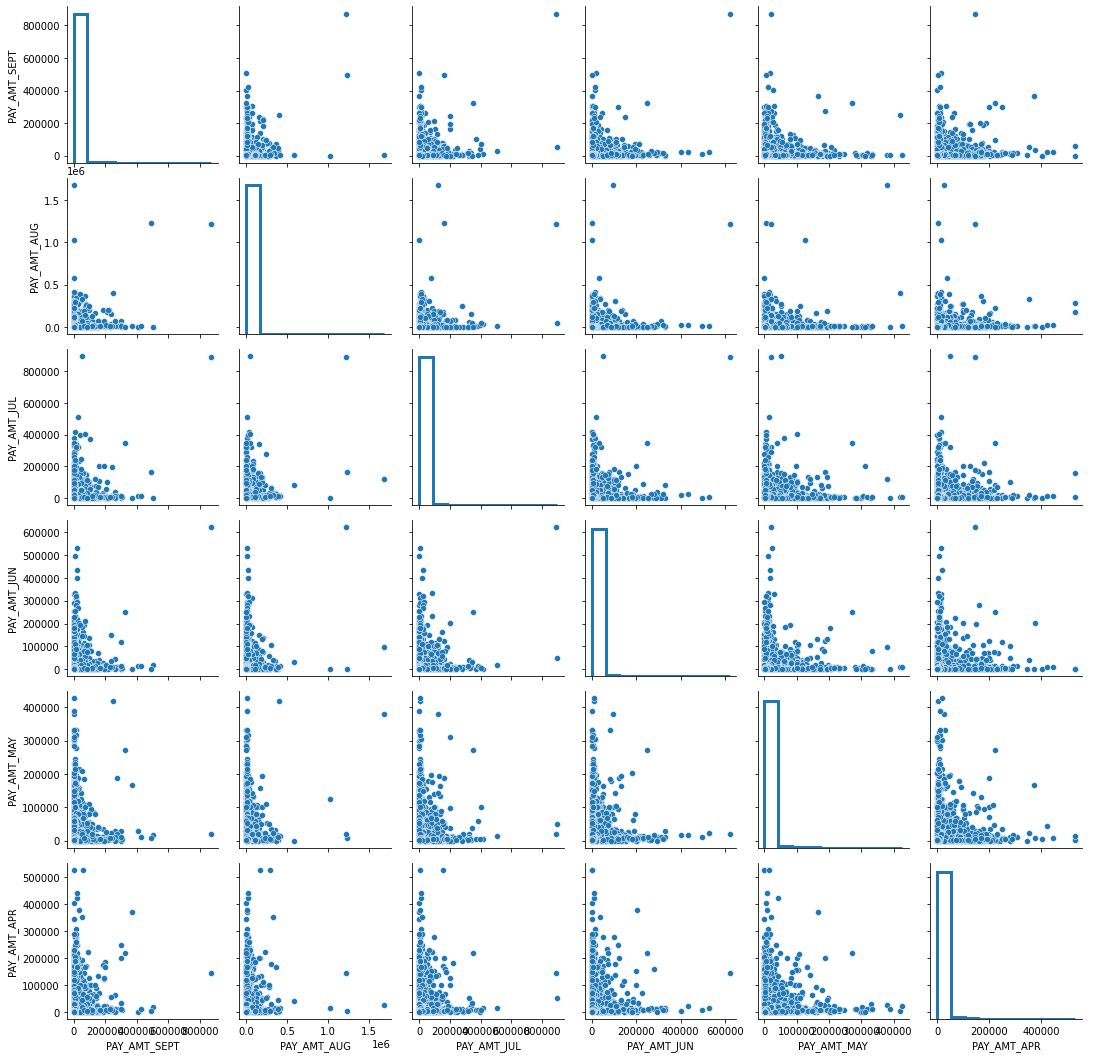

In [ ]:
g=sns.PairGrid(pay_amount  ,palette="bright")
g.map_upper(sns.scatterplot)
g.map_lower(sns.scatterplot)
g.map_diag(plt.hist, histtype="step",linewidth=3)
g.add_legend()

###From the pairplot said that each month of the payment states Defaulers and Non-defaulters.

###**(iii)Defaulters vs sex**

In [ ]:
df.groupby(['SEX','Defaulter']).size() 

SEX  Defaulter
1    0             9015
     1             2873
2    0            14349
     1             3763
dtype: int64

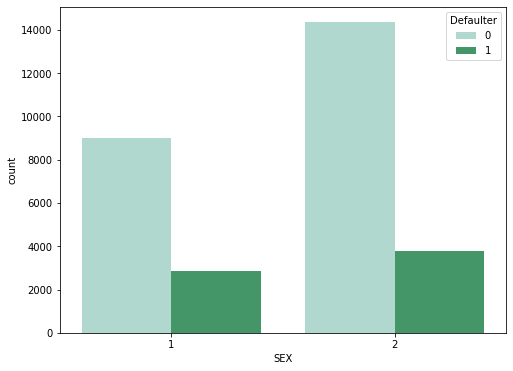

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x='SEX',hue='Defaulter',data=df,palette='BuGn')
plt.show()

###From the above figure we can conclude that defaultres were females, their number was 3763 and Height Non- defaultrs also females it's number 14,349.